In [32]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
import random
import copy

In [33]:
def create_grid(length):
    '''Creates two 3D matrices, one representing position of the predator, and the other, position of the prey.'''
    grid = np.array([[[[0 for i in range(length)] for j in range(length)] for k in range(length)] for n in range(2)])
    
    grid[0][length // 3][length // 3][length // 3] = predator
    grid[1][length * 2 // 3][length * 2 // 3][length * 2 // 3] = prey
        
    return grid

In [34]:
def index_3d(array, element):
    '''Given a 3D array ("array") and a value ("element"), finds index of the first instance of the given value in the array.'''
    for i in range(len(array)):
        for j in range(len(array[i])):
            for k in range(len(array[i][j])):
                if array[i][j][k] == element:
                    return (i, j, k)

In [35]:
def move_random(grid, animal, direction):
    '''Given the array, element, and direction to move, moves the element in that direction'''
    index = index_3d(grid, animal)
    #TODO: no diagonal movement...for now
    
    try:
        if direction == 'right':
            grid[index[0]][index[1]][index[2] + 1] = animal
            grid[index[0]][index[1]][index[2]] = 0

        elif direction == 'left':
            grid[index[0]][index[1]][index[2] - 1] = animal
            grid[index[0]][index[1]][index[2]] = 0

        elif direction == 'up':
            grid[index[0]][index[1] + 1][index[2]] = animal
            grid[index[0]][index[1]][index[2]] = 0

        elif direction == 'down':
            grid[index[0]][index[1] - 1][index[2] + 1] = animal
            grid[index[0]][index[1]][index[2]] = 0

        elif direction == 'forward':
            grid[index[0] + 1][index[1]][index[2] + 1] = animal
            grid[index[0]][index[1]][index[2]] = 0

        elif direction == 'backward':
            grid[index[0] - 1][index[1]][index[2] + 1] = animal
            grid[index[0]][index[1]][index[2]] = 0
            
    except IndexError:
        pass

In [36]:
def move_to_prey(grid):
    '''Finds position of the prey relative to the predator, and moves the predator towards the prey.'''
    
    index_predator = index_3d(grid[0], predator)
    index_prey = index_3d(grid[1], prey)

    if index_predator[0] > index_prey[0]:
        grid[0][index_predator[0] - 1][index_predator[1]][index_predator[2]] = predator
        grid[0][index_predator[0]][index_predator[1]][index_predator[2]] = 0
        
    elif index_prey[0] > index_predator[0]:
        grid[0][index_predator[0] + 1][index_predator[1]][index_predator[2]] = predator
        grid[0][index_predator[0]][index_predator[1]][index_predator[2]] = 0
        
    index_predator = index_3d(grid[0], predator)
    index_prey = index_3d(grid[1], prey)

    if index_predator[1] > index_prey[1]:
        grid[0][index_predator[0]][index_predator[1] - 1][index_predator[2]] = predator
        grid[0][index_predator[0]][index_predator[1]][index_predator[2]] = 0
        
    elif index_prey[1] > index_predator[1]:
        grid[0][index_predator[0]][index_predator[1] + 1][index_predator[2]] = predator
        grid[0][index_predator[0]][index_predator[1]][index_predator[2]] = 0
    
    index_predator = index_3d(grid[0], predator)
    index_prey = index_3d(grid[1], prey)

    if index_predator[2] > index_prey[2]:
        grid[0][index_predator[0]][index_predator[1]][index_predator[2] - 1] = predator
        grid[0][index_predator[0]][index_predator[1]][index_predator[2]] = 0
        
    elif index_prey[1] > index_predator[1]:
        grid[0][index_predator[0]][index_predator[1]][index_predator[2] + 1] = predator
        grid[0][index_predator[0]][index_predator[1]][index_predator[2]] = 0

In [37]:
def main():
    length = 5
    repeat = 1
    
    global predator, prey
    predator, prey = 1, -2
    q = 1
    
#    plt.imshow(grid[0])
#    plt.show()
    
    for n in range(repeat):
        #TODO: rewrite the indexing wiht a numpy function
        grid = create_grid(length)

        index_prey = index_3d(grid[1], prey)
        index_predator = index_3d(grid[0], predator)
        time = 0
        while((index_predator[0], index_predator[1], index_predator[2]) != (index_prey[0], index_prey[1], index_prey[2])):
            chance = random.random()
            if chance < 1/6:
                move_random(grid[1], prey, 'right')
            elif chance < 2/6:
                move_random(grid[1], prey, 'left')
            elif chance < 3/6:
                move_random(grid[1], prey, 'up')
            elif chance < 4/6:
                move_random(grid[1], prey, 'down')
            elif chance < 5/6:
                move_random(grid[1], prey, 'forward')
            else:
                move_random(grid[1], prey, 'backward')
                
            chance = random.random()
            if chance < q:
                move_to_prey(grid)
            elif chance < (1 - q) / 6:
                move_random(grid[0], predator, 'right')
            elif chance < (1 - q) * 2 / 6:
                move_random(grid[0], predator, 'left')
            elif chance < (1 - q) * 3 / 6:
                move_random(grid[0], predator, 'up')
            elif chance < (1 - q) * 4 / 6:
                move_random(grid[0], predator, 'down')
            elif chance < (1 - q) * 5 / 6:
                move_random(grid[0], predator, 'forward')
            else:
                move_random(grid[0], predator, 'backward')
            
            #TODO: rewrite the indexing wiht a numpy function (continued)
            index_prey = index_3d(grid[1], prey)
            index_predator = index_3d(grid[0], predator)
            
            full_grid = np.add(grid[0], grid[1])   
            x, y, z = full_grid.nonzero()
            fig = plt.figure()
            ax = fig.add_subplot(111, projection='3d')
            ax.scatter(x, y, -z, zdir='z', c= 'red')

    '''        
    mean = np.mean(np.array([n for n in grid]), axis=0)
    x, y, z = mean.nonzero()
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x, y, -z, zdir='z', c= 'red')
    '''

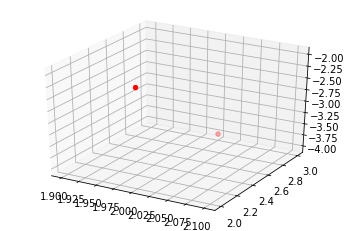

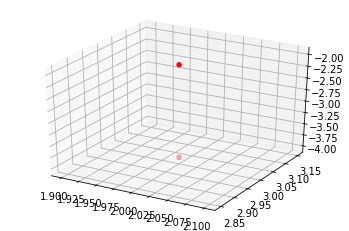

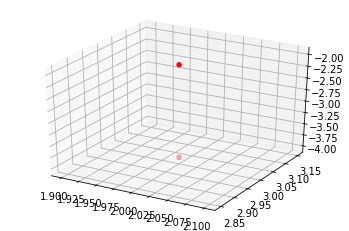

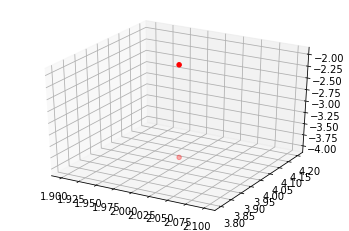

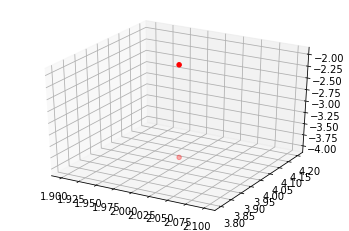

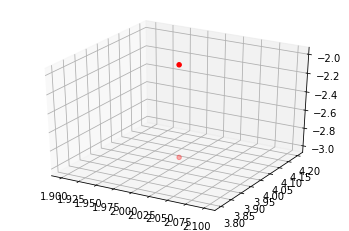

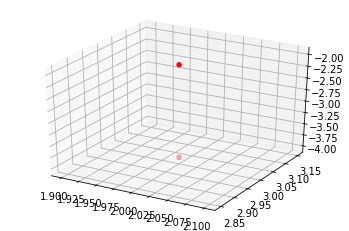

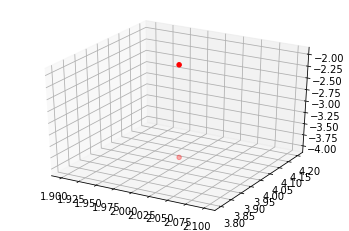

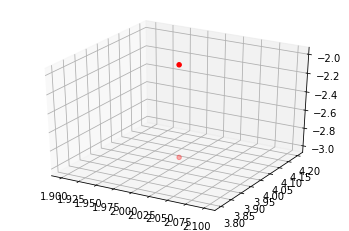

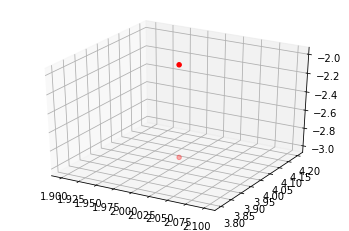

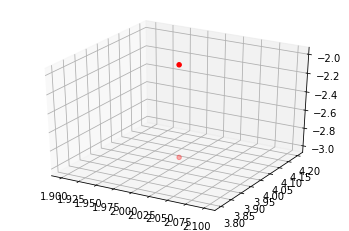

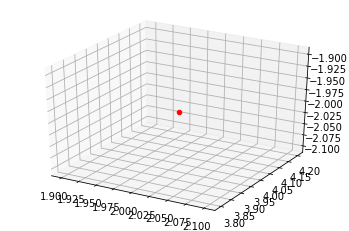

In [39]:
main()